# Práctica 2 - MLP para funciones lógicas - Lab 2
## Preparación de entorno
#### Instalar las librerías

In [98]:
# %pip install torch
# %pip install numpy
# %pip install matplotlib
# %pip install pandas

#### Importar librerías de código

In [99]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## MLP SetUp

* **Perceptrón Multicapa** $\rightarrow$ Red neuronal artificial feedfoward (la información fluye en una dirección, desde la capa de entrada hasta la de salida, sin bucles).
  * Al menos **3 capas**: entrada, oculta y salida.
  * Cada neurona en las capas ocultas y de salida recibe **entradas** de todas las neuronas de la capa anterior, calcula una **suma ponderada** más un sesgo (bias) y aplica una **función de activación** no lineal.

* **Capas del MLP**:
  * **Capa de entrada** $\rightarrow$ REpresenta las características de los datos de entrada, con un número de neuronas igual a la dimensión de los datos de entrada.
  * **Capas ocultas** $\rightarrow$ Procesan las entradas mediante sumas ponderadas y funciones de activación, como la $\text{ReLU}$, la $\text{sigmoide}$ o la $\text{tangente hiperbólica}$.
  * **Capa de salida** $\rightarrow$ Produce las predicciones finales, cno el número de neuronas dependiendo del problema a resolver (regresión, clasificación binaria o multiclase).

* **Entrenamiento del MLP**:
  * **Backpropagation** $\rightarrow$ Método supervisado que ajusta los pesos para minizar la función de pérdida. También se pueden usar otros métodos como Adam, que procesa los datos n mini-lotes hasta converger o alcanzar un número fijo de épocas.

* **Capacidad matemática** $\rightarrow$ Los MLP pueden aproximar cualquier función continua, según el teorema de aproximación universal, dado un número suficiente de neuronas en y capas.

Diferencia entre **Perceptrón** y **Perceptrón Multicapa**:

| Aspecto            | Perceptrón                                           | Perceptrón Multicapa                                                            |
| ------------------ | ---------------------------------------------------- | ------------------------------------------------------------------------------- |
| **Capas**          | Una sola capa (entrada y salida).                    | Al menos 3 capas (entrada, oculta y salida).                                    |
 | **Problema tipo** | Linealmente separable (clasificación binaria).       | No linealmente separable, clasificación y regresión complejas.                  |
 | **Entrenamiento** | Regla de aprendizaje simple.                         | Backpropagation y otros métodos más complejos (requiere funciones no lineales). |
 | **Limitaciones**  | No resuelve el XOR (esta limitado a datos lineales). | Puede sobreajustar si no se controla la complejidad del modelo.                 |

* **Proceso de aprendizaje**:
  1. **Inicialización** $\rightarrow$ Primero, inicializamos los pesos $W$ y el sesgo (bias) $b$ de la red de forma aleatoria (normalmente se usan distribuciones como la normal o la uniforme.). Además, preparamos los valores iniciales para Adam como los vectores de momentos $m_0 = 0$ (primer momento, relacionado con la media de los gradientes) y $v_0 = 0$ (segundo momento, relacionado con la varianza de los gradientes). Los hiperparámetros de Adam incluyen:
     1. $\alpha$ $\rightarrow$ Learning rate.
     2. $\beta_1$ $\rightarrow$ Factor de decaimiento para el primer momento.
     3. $\beta_2$ $\rightarrow$ Factor de decaimiento para el segundo momento.
     4. $\epsilon$ $\rightarrow$ Constante para evitar divisiones entre cero.
  
  2. **Presentación del patrón** $\rightarrow$ Seleccionamos un patrón de entrenamiento (una entrada $x$ y su salida deseada $y$). 
  
  3. **Cálculo de la salida** $\rightarrow$ Propagamos hacia adelante la entrada $x$ a través de la red. Para una red con una capa oculta, el proceso es:
     1. **Capa oculta** $\rightarrow$ $h = ReLU (W_1 \cdot x + b_1)$, donde $ReLU$ es la función de activación $f(x) = max(0, x)$. $ReLU$ nos ayuda a mitigar el problema del desvanecimiento del gradiente.
     2. **Capa de salida** $\rightarrow$ $y_{pred} = sigmoide (W_2 \cdot h + b_2)$, donde $sigmoide$ es la función de activación $f(x) = \frac{1}{1 + e^{-x}}$. Esta función es útil para producir salidas en el rango $[0, 1]$.
  
  4. **Cálculo del Error** $\rightarrow$ Usamos la función de pérdida *Mean Squared Error* (MSE) para calcular el error entre la salida que hemos predicho y la salida que esperábamos. La función MSE es:
     $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{pred} - y_{esperada})^2$$

  5. **Variación de los pesos** $\rightarrow$ Con Adam, calculamos los gradientes de la pérdida con respecto a cada parámetro usando backpropagation. Adam actualiza los pesos adaptando el learning rate para cada parámetro basado en los momentos. Los pasos son:
     1. Calculamos el gradiente $g_t$ en el paso $t$.
     2. Actualizamos el primer momento: $m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$.
     3. Actualizamos el segundo momento: $v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$.
     4. Corregismos el bias: $\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$ y $\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$.
     5. Actualizamos los parámetros $W$ y $b$: $W_t = W_{t-1} - \alpha \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}$.
  
  6. **Modificación de los pesos$** $\rightarrow$ Aplicamos las actualizaciones que hemos calculado, ajustando $W$ y $b$ según la fórmula de Adam.
  
  7. **Repetir** $\rightarrow$ Repetimos los pasos 2 a 6 para cada patrón de entrenamiento, hasta que la red haya visto todos los patrones del conjunto de entrenamiento.
  
  8. **Verificar la convergencia** $\rightarrow$ Comprobamos si el error (MSE) ha alcanzado un valor aceptable o si el número de épocas ha llegado a un límite. Si no, volvemos al paso 2.

Referencias (código):
* [MultilayerNN.](https://github.com/KDA-lab/NN-Chainer/blob/edac5d4c6d664404117bcaad253f8e003af278e5/multilayerNN.py)


=== Modelo 1 con 2 neuronas, LR=0.01 ===
Parada temprana en época 431/500
Error final: 0.167481

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.661953  |
| 0.0  | 1.0  | 1.0    | 0.661953  |
| 1.0  | 0.0  | 1.0    | 0.661953  |
| 1.0  | 1.0  | 0.0    | 0.056242  |
------------------------------------

=== Modelo 2 con 2 neuronas, LR=0.1 ===
Parada temprana en época 17/500
Error final: 0.250702

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.482787  |
| 0.0  | 1.0  | 1.0    | 0.482787  |
| 1.0  | 0.0  | 1.0    | 0.482787  |
| 1.0  | 1.0  | 0.0    | 0.482787  |
------------------------------------

=== Modelo 3 con 2 neuronas, LR=0.5 ===
Parada temprana en época 54/500
Error final: 0.166852

Resultados del perceptrón multicapa:
-------

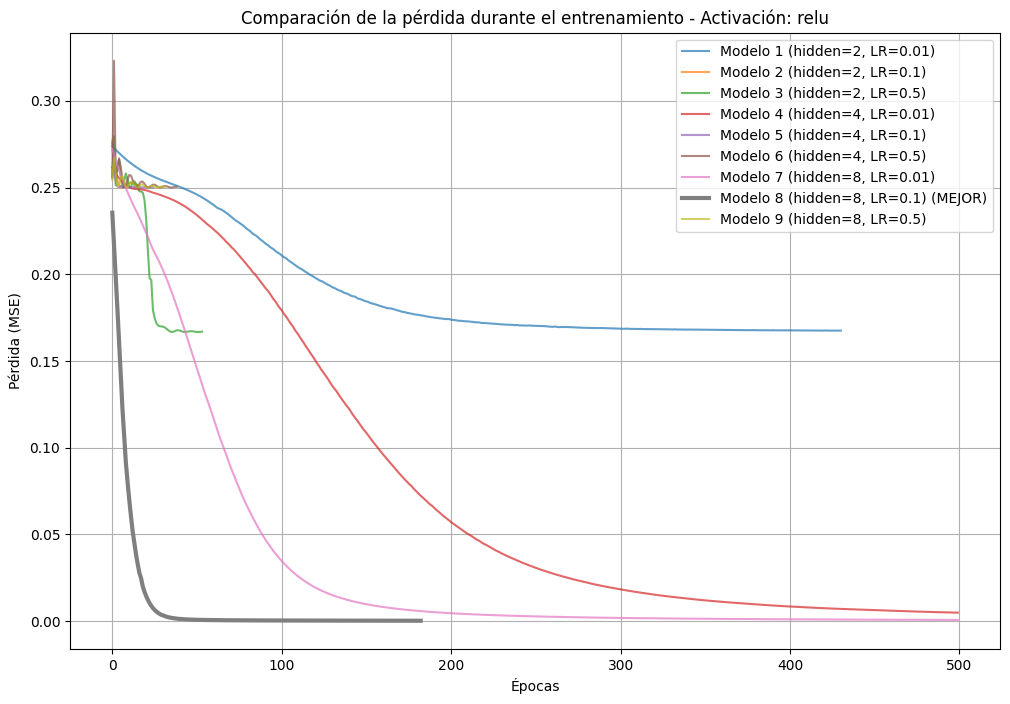

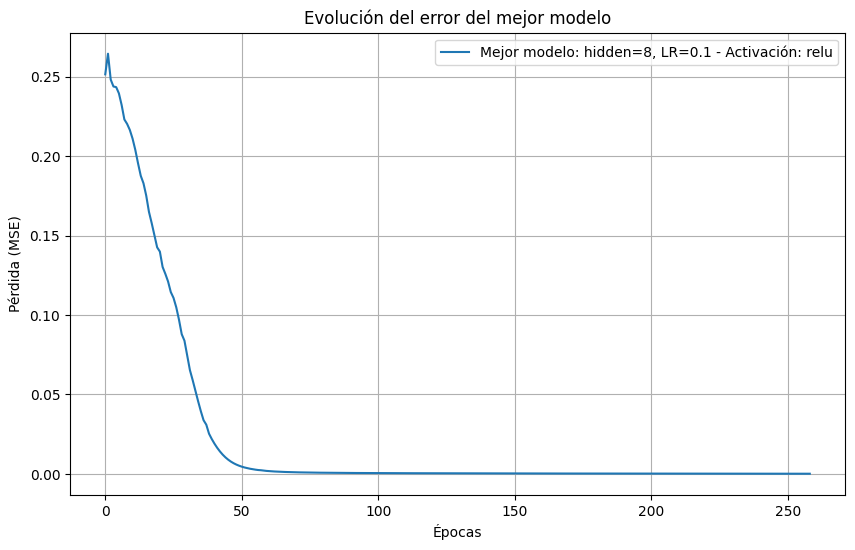


=== Tabla de resultados de todas las iteraciones ===


,Neuronas capa oculta,Épocas,Salida,Error
0,2,431,"[0.662, 0.662, 0.662, 0.056]",0.167481
1,2,17,"[0.483, 0.483, 0.483, 0.483]",0.250702
2,2,54,"[0.000, 0.649, 0.649, 0.649]",0.166852
3,4,500,"[0.066, 0.910, 0.943, 0.058]",0.004793
4,4,25,"[0.500, 0.498, 0.493, 0.491]",0.250034
5,4,39,"[0.518, 0.518, 0.518, 0.518]",0.250459
6,8,500,"[0.028, 0.978, 0.975, 0.023]",0.000604
7,8,183,"[0.007, 0.995, 0.978, 0.005]",0.000141
8,8,32,"[0.504, 0.504, 0.504, 0.504]",0.250212



=== Información del mejor modelo ===


,Función de activación,Neuronas capa oculta,Learning Rate,Error final,Iteraciones
0,Relu,8,0.1,0.00017,259



=== Tabla detallada entrenamiento del mejor modelo ===


,Valores neuronas capa oculta,Neuronas capa oculta,Época,Salida,Error
0,"[0.200, ..., 0.043]",Matriz 8×2,0,"[0.519, 0.504, 0.453, 0.437]",0.251371
1,"[0.108, ..., -0.011]",Matriz 8×2,1,"[0.628, 0.630, 0.627, 0.622]",0.264335
2,"[0.054, ..., -0.066]",Matriz 8×2,2,"[0.555, 0.564, 0.541, 0.532]",0.248066
3,"[-0.018, ..., -0.098]",Matriz 8×2,3,"[0.471, 0.494, 0.448, 0.439]",0.243725
4,"[-0.098, ..., -0.116]",Matriz 8×2,4,"[0.418, 0.463, 0.412, 0.406]",0.243329
...,...,...,...,...,...
254,"[-1.489, ..., -2.561]",Matriz 8×2,254,"[0.005, 0.992, 0.995, 0.024]",0.000174
255,"[-1.489, ..., -2.562]",Matriz 8×2,255,"[0.005, 0.992, 0.995, 0.024]",0.000173
256,"[-1.490, ..., -2.562]",Matriz 8×2,256,"[0.005, 0.992, 0.995, 0.024]",0.000172
257,"[-1.490, ..., -2.563]",Matriz 8×2,257,"[0.005, 0.992, 0.995, 0.024]",0.000171



=== Frontera de decisión del mejor modelo ===


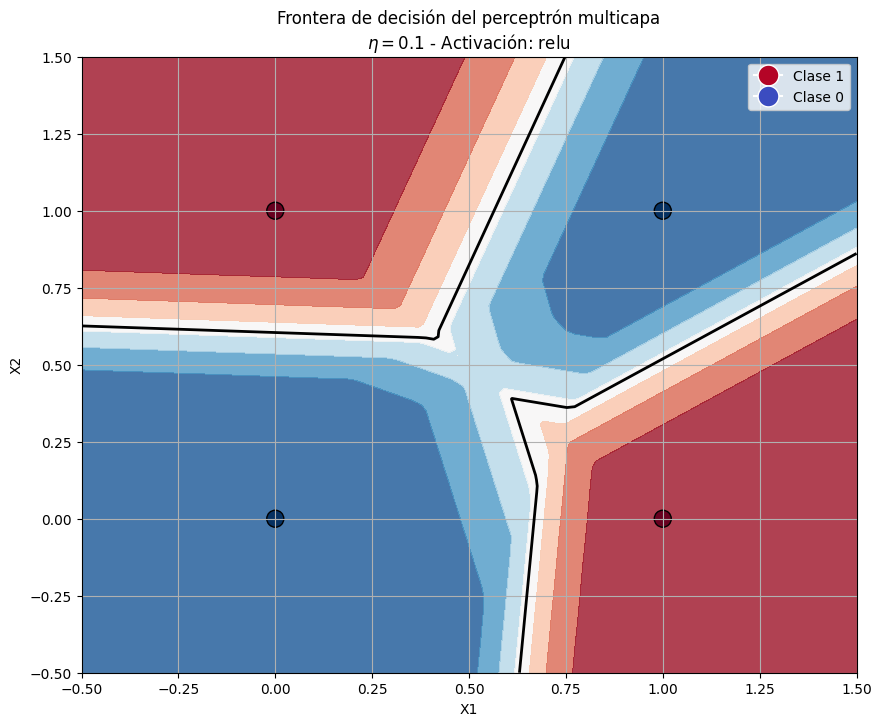


=== Modelo 1 con 2 neuronas, LR=0.01 ===

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.082946  |
| 0.0  | 1.0  | 1.0    | 0.488194  |
| 1.0  | 0.0  | 1.0    | 0.923558  |
| 1.0  | 1.0  | 0.0    | 0.507989  |
------------------------------------

=== Modelo 2 con 2 neuronas, LR=0.1 ===
Parada temprana en época 330/500
Error final: 0.166825

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target | Predicho  |
------------------------------------
| 0.0  | 0.0  | 0.0    | 0.015904  |
| 0.0  | 1.0  | 1.0    | 0.666251  |
| 1.0  | 0.0  | 1.0    | 0.666336  |
| 1.0  | 1.0  | 0.0    | 0.666577  |
------------------------------------

=== Modelo 3 con 2 neuronas, LR=0.5 ===
Parada temprana en época 74/500
Error final: 0.166718

Resultados del perceptrón multicapa:
------------------------------------
|  X1  |  X2  | Target |

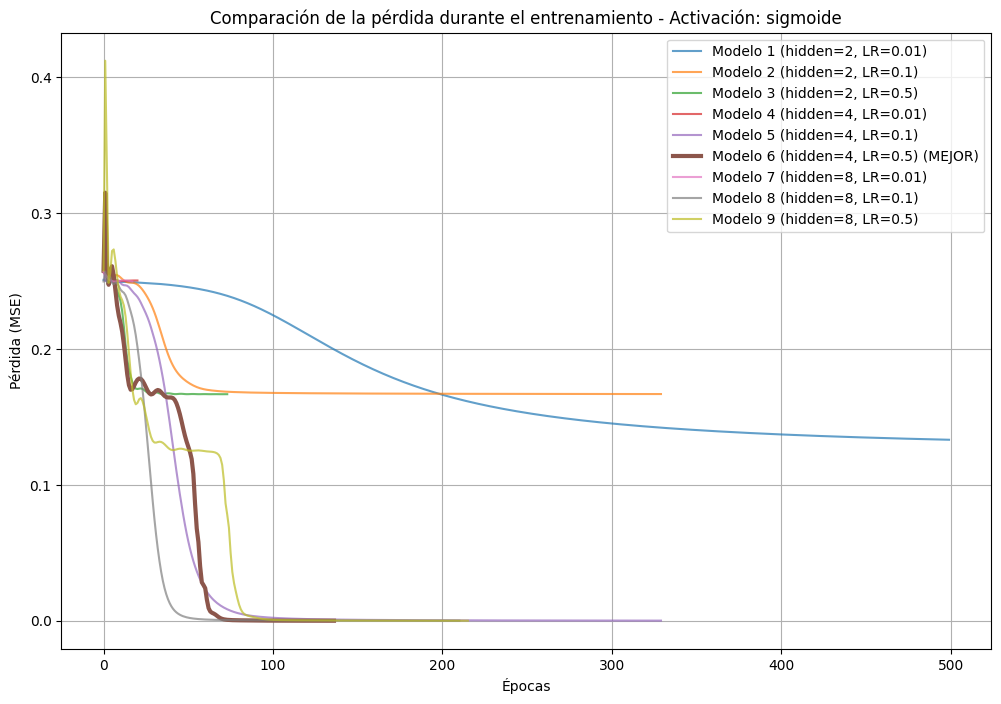

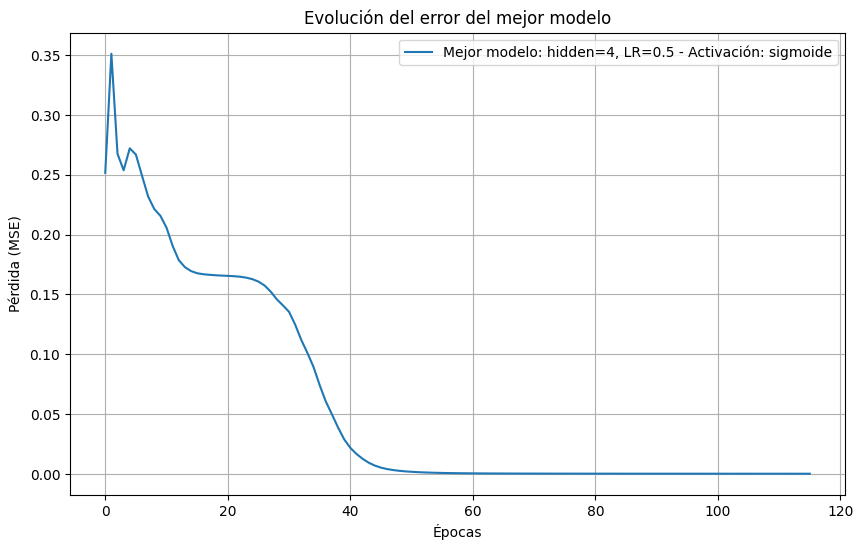


=== Tabla de resultados de todas las iteraciones ===


,Neuronas capa oculta,Épocas,Salida,Error
0,2,500,"[0.083, 0.488, 0.924, 0.508]",0.133209
1,2,330,"[0.016, 0.666, 0.666, 0.667]",0.166825
2,2,74,"[0.003, 0.663, 0.663, 0.663]",0.166718
3,4,21,"[0.479, 0.483, 0.477, 0.481]",0.250346
4,4,330,"[0.012, 0.986, 0.987, 0.016]",0.000190
5,4,137,"[0.007, 0.991, 0.990, 0.015]",0.000115
6,8,18,"[0.506, 0.510, 0.524, 0.524]",0.249623
7,8,211,"[0.009, 0.989, 0.987, 0.015]",0.000150
8,8,216,"[0.002, 0.988, 0.994, 0.020]",0.000148



=== Información del mejor modelo ===


,Función de activación,Neuronas capa oculta,Learning Rate,Error final,Iteraciones
0,Sigmoide,4,0.5,0.000159,116



=== Tabla detallada entrenamiento del mejor modelo ===


,Valores neuronas capa oculta,Neuronas capa oculta,Época,Salida,Error
0,"[-0.001, 0.699, -0.752, -1.199]",Matriz 4×2,0,"[0.450, 0.453, 0.468, 0.471]",0.251627
1,"[-0.373, 0.543, -1.179, -1.663]",Matriz 4×2,1,"[0.812, 0.823, 0.816, 0.825]",0.351192
2,"[-0.752, 0.326, -1.490, -1.957]",Matriz 4×2,2,"[0.623, 0.636, 0.634, 0.645]",0.267525
3,"[-1.105, 0.306, -1.819, -2.302]",Matriz 4×2,3,"[0.382, 0.414, 0.419, 0.434]",0.253784
4,"[-1.501, 0.357, -2.206, -2.696]",Matriz 4×2,4,"[0.278, 0.332, 0.338, 0.355]",0.272130
...,...,...,...,...,...
111,"[-7.336, -7.617, -13.673, -13.991]",Matriz 4×2,111,"[0.001, 0.989, 0.989, 0.020]",0.000162
112,"[-7.336, -7.618, -13.673, -13.991]",Matriz 4×2,112,"[0.001, 0.989, 0.989, 0.020]",0.000161
113,"[-7.336, -7.618, -13.673, -13.991]",Matriz 4×2,113,"[0.001, 0.989, 0.989, 0.020]",0.000160
114,"[-7.336, -7.619, -13.673, -13.992]",Matriz 4×2,114,"[0.001, 0.989, 0.989, 0.020]",0.000159



=== Frontera de decisión del mejor modelo ===


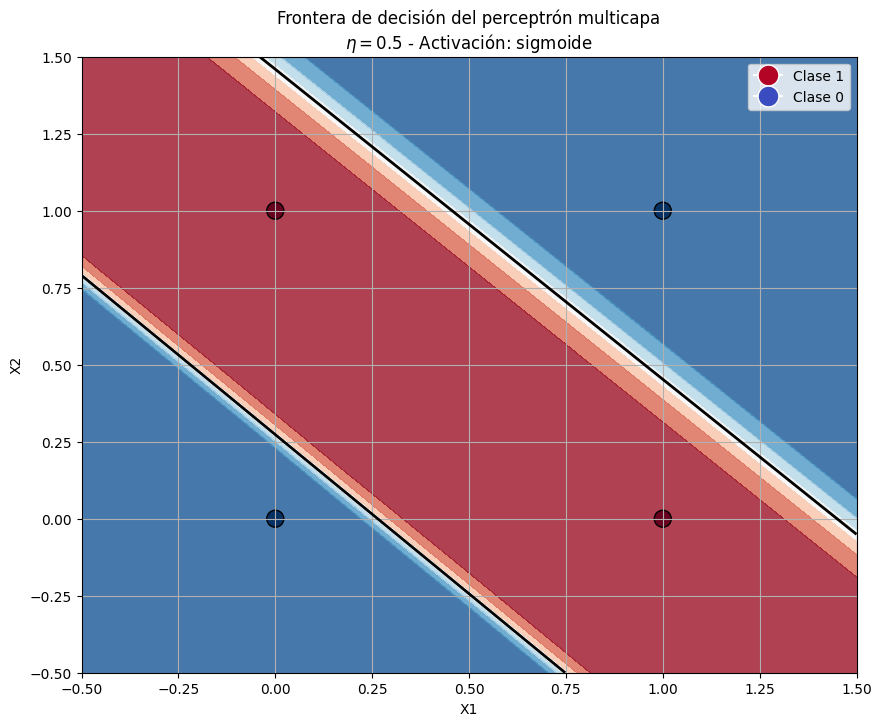

In [100]:
class PerceptronMLP(nn.Module):
    def __init__(self, tamano_entrada, tamano_oculta, tamano_salida, learning_rate=0.1, max_iteraciones=100, activacion='relu'):
        super(PerceptronMLP, self).__init__()
        self.capa_oculta = nn.Linear(tamano_entrada, tamano_oculta)
        self.capa_salida = nn.Linear(tamano_oculta, tamano_salida)
        self.sigmoide = nn.Sigmoid()

        self.activacion = activacion

        # Seleccionamos la función de activación para la capa oculta
        # hemos añadido la opción de 'sigmoide' para comparar con 'relu'
        if self.activacion == 'relu':
            self.func_activacion = nn.ReLU()
        elif self.activacion == 'sigmoide':
            self.func_activacion = nn.Sigmoid()
        else:
            raise ValueError("Función de activación no soportada. Usa 'relu' o 'sigmoide'")

        self.mse = nn.MSELoss()
        self.learning_rate = learning_rate
        self.max_iteraciones = max_iteraciones
        self.errores = []
        self.detalles_entrenamiento = []


    def forward(self, entrada) -> torch.Tensor:
        """Función que hace el Feed Forward de la red neuronal. Primero pasa las
        características por la capa oculta, luego aplica la función de activación
        seleccionada por el usuario y finalmente pasa por la capa de salida
        y la función sigmoide.

        Args:
            entrada: Características de entrada para la red

        Returns:
            torch.Tensor: Salida de la red neuronal
        """

        salida = self.capa_oculta(entrada)
        salida = self.func_activacion(salida)
        salida = self.capa_salida(salida)
        salida = self.sigmoide(salida)
        return salida


    def entrenar(self, X, y) -> None:
        """Entrenar el perceptrón multicapa con un conjunto de
        datos de entrada X y sus respectivas salidas esperadas y.

        Args:
            X: Entradas de entrenamiento
            y: Salidas esperadas de entrenamiento
        """

        # Si no es un tensor, lo convertimos a tensor
        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)
        if not isinstance(y, torch.Tensor):
            y = torch.tensor(y, dtype=torch.float32)

        # Inicializamos el optimizador (Adam)
        optimizador = optim.Adam(self.parameters(), lr=self.learning_rate)

        # Inicializamos la lista de errores y detalles de entrenamiento
        self.errores = []
        self.detalles_entrenamiento = []

        mejor_error = float('inf')
        paciencia = 10
        contador_early_stopping = 0

        for epoca in range(self.max_iteraciones):

            # 1. Fast Forward
            salida = self.forward(X)
            error = self.mse(salida, y)
            error_valor = error.item()
            self.errores.append(error_valor)

            # 2. Backpropagation
            # Limpiamos los gradientes para no acumularlos
            optimizador.zero_grad()

            # Calculamos los gradientes
            error.backward()

            # Actualizamos los pesos
            optimizador.step()

            # 3. Guardamos los detalles de la iteración
            self.detalles_entrenamiento.append({
                'neuronas_ocultas': self.capa_oculta.weight.detach().numpy().copy(),
                'época': epoca,
                'salida': salida.detach().numpy().copy(),
                'error': error_valor
            })

            # Early stopping (solo si vemos que no mejora significativamente)
            if error_valor < mejor_error - 1e-5:
                # Hay una mejora significativa
                mejor_error = error_valor
                contador_early_stopping = 0
            else:
                contador_early_stopping += 1

            # Si hemos alcanzado nuestra paciencia, detenemos el entrenamiento
            if contador_early_stopping >= paciencia:
                print(f'Parada temprana en época {epoca+1}/{self.max_iteraciones}')
                print(f'Error final: {error_valor:.6f}')
                break

            # Opcional: Si el error es muy bajo, también paramos
            if error_valor < 1e-6:
                print(f'Error mínimo alcanzado en época {epoca+1}/{self.max_iteraciones}')
                break


    def mostrar_errores(self, lista_errores, etiquetas, titulo="Comparación de la pérdida durante el entrenamiento") -> None:
        """Muestra una gráfica con la evolución de los errores de varios modelos.

        Args:
            lista_errores: Lista de listas con los errores de cada modelo
            etiquetas: Lista de etiquetas para los modelos
            titulo (str, optional): Título de la gráfica. Por defecto es "Comparación de la pérdida durante el entrenamiento".
        """

        plt.figure(figsize=(10, 6))
        for error, etiqueta in zip(lista_errores, etiquetas):
            plt.plot(error, label=etiqueta)

        plt.xlabel('Épocas')
        plt.ylabel('Pérdida (MSE)')
        plt.title(titulo)
        plt.legend()
        plt.grid(True)
        plt.show()


    def probar_y_mostrar(self, X, y) -> None:
        """Probar el perceptrón con un conjunto de datos de entrada X y
        sus respectivas salidas esperadas y y mostrar los resultados.

        Args:
            X: Entradas de prueba
            y: Salidas esperadas de prueba
        """

        print("\nResultados del perceptrón multicapa:")
        print("------------------------------------")
        print("|  X1  |  X2  | Target | Predicho  |")
        print("------------------------------------")

        if not isinstance(X, torch.Tensor):
            X = torch.tensor(X, dtype=torch.float32)

        with torch.no_grad():
            for i in range(len(X)):
                entrada = X[i:i+1]
                prediccion = self(entrada).item()

                if isinstance(y, np.ndarray) and y[i].size == 1:
                    target = y[i].item()
                elif isinstance(y, list):
                    target = y[i]
                elif isinstance(y, torch.Tensor):
                    target = y[i].item() if y[i].numel() == 1 else y[i][0].item()
                else:
                    target = y[i]

                print(f"| {X[i][0].item():.1f}  | {X[i][1].item():.1f}  | {target:.1f}    | {prediccion:.6f}  |")

        print("------------------------------------")


    def mostrar_frontera_decision(self, X, y):
        """Muestra la frontera de decisión del perceptrón en un gráfico

        Args:
            X: Datos de entrada
            y: Salidas esperadas
        """

        # Creamos una malla para ver la frontera de decisión
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))

        # Convertimos a tensor de PyTorch
        grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

        # Calculamos la predicción para cada punto de la malla
        with torch.no_grad():
            Z = self(grid)
            Z = Z.reshape(xx.shape).numpy()

        # Pintamos la frontera de decisión
        plt.figure(figsize=(10, 8))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
        plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=2)

        # Pintamos los puntos del entrenamiento
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.RdBu_r, edgecolors='k', s=150)

        # Crear elementos de leyenda
        legend_elements = [
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#B40426', markersize=15, label='Clase 1'),
            Line2D([0], [0], marker='o', color='w', markerfacecolor='#3B4CC0', markersize=15, label='Clase 0')
        ]

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(f'Frontera de decisión del perceptrón multicapa\n$\\eta = {self.learning_rate}$ - Activación: {self.activacion}')
        plt.legend(handles=legend_elements, loc='best')
        plt.grid(True)
        plt.show()


    def generar_tabla_entrenamiento(self) -> pd.DataFrame:
        """Genera una tabla detallada del proceso de entrenamiento con una
        estructura única de columnas.

        Returns:
            pd.DataFrame: Tabla de entrenamiento
        """
        if not self.detalles_entrenamiento:
            return "No hay detalles de entrenamiento disponibles."

        # Creamos el DataFrame con los detalles de entrenamiento
        datos = []
        for detalle in self.detalles_entrenamiento:
            # Para cada registro de entrenamiento
            epoca = detalle['época']
            error = detalle['error']

            # Formateamos las neuronas de la capa oculta para que sea más bonito
            neuronas = detalle['neuronas_ocultas']
            # Mostrar la forma de la matriz
            neuronas_matriz = f"Matriz {neuronas.shape[0]}×{neuronas.shape[1]}"


            if len(neuronas) <= 4:
                neuronas_str = "["
                for i in range(len(neuronas)):
                    neuronas_str += f"{neuronas[i][0]:.3f}"
                    if i < len(neuronas) - 1:
                        neuronas_str += ", "
                neuronas_str += "]"
            else:
                neuronas_str = f"[{neuronas[0][0]:.3f}, ..., {neuronas[-1][0]:.3f}]"

            # Formateamos la salida para que sea más bonita
            salida = detalle['salida']

            if len(salida) <= 4:
                salida_str = "["
                for i in range(len(salida)):
                    salida_str += f"{salida[i][0]:.3f}"
                    if i < len(salida) - 1:
                        salida_str += ", "
                salida_str += "]"
            else:
                salida_str = f"[{salida[0][0]:.3f}, ..., {salida[-1][0]:.3f}]"

            # Agregar fila a la tabla
            datos.append({
                "Valores neuronas capa oculta": neuronas_str,
                "Neuronas capa oculta": neuronas_matriz,
                "Época": epoca,
                "Salida": salida_str,
                "Error": f"{error:.6f}"
            })

        # Creamos el DataFrame con los datos
        df = pd.DataFrame(datos)

        return df


    def generar_tabla_modelo(self) -> pd.DataFrame:
        """Genera una tabla con los parámetros y resultados del modelo.

        Returns:
            pd.DataFrame: Tabla con los parámetros y resultados del modelo
        """
        # Creamos la tabla con los parámetros y resultados del modelo
        tabla = {
            "Función de activación": [self.activacion.capitalize()],
            "Neuronas capa oculta": [self.capa_oculta.out_features],
            "Learning Rate": [self.learning_rate],
            "Error final": [self.errores[-1]],
            "Iteraciones": [len(self.errores)]
        }

        return pd.DataFrame(tabla)


def evaluar_diferentes_parametros(X, y, tipo_activacion):
    """Evaluar diferentes parámetros para el perceptrón y mostrar los resultados.

    Args:
        X: Datos de entrada
        y: Salidas esperadas
        tipo_activacion: Tipo de función de activación para la capa oculta ('relu' o 'sigmoide')
    Returns:
        list: Lista con los resultados de la evaluación
    """

    tamano_capa_entrada = 2
    tamano_capa_salida = 1

    # Rangos de valores para la capa oculta, epocas y learning_rates
    tamanos_capa_oculta = [2, 4, 8]
    learning_rates = [0.01, 0.1, 0.5]

    resultados = []
    errores = []
    etiquetas = []
    mejor_iteracion = float('inf')
    mejor_error = float('inf')
    mejor_tamano_capa_oculta = None
    mejor_learning_rate = None
    mejor_modelo_idx = -1

    modelo_idx = 0

    tabla_resultados = []

    for tamano_capa_oculta in tamanos_capa_oculta:
        for learning_rate in learning_rates:
            modelo_idx += 1
            print(f"\n=== Modelo {modelo_idx} con {tamano_capa_oculta} neuronas, LR={learning_rate} ===")

            mlp = PerceptronMLP(
                tamano_capa_entrada,
                tamano_capa_oculta,
                tamano_capa_salida,
                learning_rate=learning_rate,
                max_iteraciones=500,
                activacion=tipo_activacion
                )

            mlp.entrenar(X, y)

            # Evaluamos los resultados
            error_final = mlp.errores[-1]
            umbral_convergencia = 0.01
            convergencia_alcanzada = error_final < umbral_convergencia

            # Probamos el perceptrón
            mlp.probar_y_mostrar(X, y)

            # Guardamos los errores y etiquetas para la visualización
            errores.append(mlp.errores)
            etiquetas.append(f'Modelo {modelo_idx} (hidden={tamano_capa_oculta}, LR={learning_rate})')

            resultados.append({
                'neuronas_capa_oculta': tamano_capa_oculta,
                'convergencia': convergencia_alcanzada,
                'error_final': error_final,
                'learning_rate': learning_rate
            })

            with torch.no_grad():
                if not isinstance(X, torch.Tensor):
                    X_tensor = torch.tensor(X, dtype=torch.float32)
                else:
                    X_tensor = X

                salida = mlp(X_tensor).detach().numpy()

                # Formateamos la salida para mostrarla de forma compacta
                if len(salida) <= 4:
                    salida_str = "["
                    for i in range(len(salida)):
                        salida_str += f"{salida[i][0]:.3f}"
                        if i < len(salida) - 1:
                            salida_str += ", "
                    salida_str += "]"
                else:
                    salida_str = f"[{salida[0][0]:.3f}, ..., {salida[-1][0]:.3f}]"


            tabla_resultados.append({
                "Neuronas capa oculta": tamano_capa_oculta,
                "Épocas": len(mlp.errores),
                "Salida": salida_str,
                "Error": f"{error_final:.6f}"
            })

            if error_final < mejor_error:
                mejor_funcion_activacion = tipo_activacion
                mejor_error = error_final
                mejor_learning_rate = learning_rate
                mejor_tamano_capa_oculta = tamano_capa_oculta
                mejor_iteracion = len(mlp.errores)
                mejor_modelo_idx = modelo_idx - 1  # Guardamos el índice del mejor modelo


    print("\n=== Mejores parámetros encontrados ===")
    print(f"Learning Rate: {mejor_learning_rate}, neuronas capa oculta: {mejor_tamano_capa_oculta}")
    print(f"Error final: {mejor_error:.6f}")
    print(f"Convergió en {mejor_iteracion} iteraciones")

    # Creamos el mejor perceptrón con los parámetros encontrados
    mejor_perceptron = PerceptronMLP(
                        tamano_capa_entrada,
                        mejor_tamano_capa_oculta,
                        tamano_capa_salida,
                        learning_rate=mejor_learning_rate,
                        max_iteraciones=500,
                        activacion=mejor_funcion_activacion)
    mejor_perceptron.entrenar(X, y)

    # Mostramos la gráfica con la evolución del error de todos los modelos
    print("\n=== Evolución del error durante el entrenamiento ===")

    # Primero mostrar todos los modelos
    plt.figure(figsize=(12, 8))
    for i, (error, etiqueta) in enumerate(zip(errores, etiquetas)):
        if i == mejor_modelo_idx:
            # Resaltamos el mejor modelo con línea más gruesa
            plt.plot(error, label=etiqueta + ' (MEJOR)', linewidth=3)
        else:
            plt.plot(error, label=etiqueta, alpha=0.7)

    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.title(f'Comparación de la pérdida durante el entrenamiento - Activación: {mejor_funcion_activacion}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Ahora mostrar solo el mejor modelo para verlo más claro
    plt.figure(figsize=(10, 6))
    plt.plot(mejor_perceptron.errores, label=f'Mejor modelo: hidden={mejor_tamano_capa_oculta}, LR={mejor_learning_rate} - Activación: {mejor_funcion_activacion}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida (MSE)')
    plt.title('Evolución del error del mejor modelo')
    plt.legend()
    plt.grid(True)
    plt.show()

    print("\n=== Tabla de resultados de todas las iteraciones ===")
    tabla_df = pd.DataFrame(tabla_resultados)
    display(tabla_df)

    print("\n=== Información del mejor modelo ===")
    mejor_perceptron_detalles = mejor_perceptron.generar_tabla_modelo()
    display(mejor_perceptron_detalles)

    print("\n=== Tabla detallada entrenamiento del mejor modelo ===")
    mejor_perceptron_detalles_entrenamiento = mejor_perceptron.generar_tabla_entrenamiento()
    display(mejor_perceptron_detalles_entrenamiento)


    # Mostramos la frontera de decisión de nuestro mejor modelo
    print("\n=== Frontera de decisión del mejor modelo ===")
    mejor_perceptron.mostrar_frontera_decision(X, y)

    return resultados

# Datos de entrenamiento para la función XOR
X_XOR = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_XOR = np.array([[0], [1], [1], [0]])

resultados_XOR_relu = evaluar_diferentes_parametros(X_XOR, y_XOR, 'relu')
resultados_XOR_sigmoide = evaluar_diferentes_parametros(X_XOR, y_XOR, 'sigmoide')